<a href="https://colab.research.google.com/github/A-Belknap/austin_INFO5707_Spring2022/blob/main/lab_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The tenth Lab-assignment (04/28/2022, 50 points in total)

The purpose of this assignment is to practice normal distribution and annotation quality evaluation.

### Question 1 (25 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab10-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [1]:
# your code here
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# read in the file and data
file = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab10-dataset.csv'

df = pd.read_csv(file)

In [2]:
# examine the dataframe
df.head()

,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN


In [3]:
df2 = df[['Annotation1', 'Annotation2', 'Annotation3']]

df2.head()

,Annotation1,Annotation2,Annotation3
0,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization
1,Theory proposal\n,Theory proposal\n,Theory proposal\n
2,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n
3,Theory proposal\n,Theory proposal\n,Theory proposal\n
4,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization


In [4]:
df2 = df2.apply(lambda x: pd.factorize(x)[0])
df2.head()

,Annotation1,Annotation2,Annotation3
0,0,0,0
1,1,1,1
2,1,0,1
3,1,1,1
4,0,2,0


In [5]:
df2.describe()

,Annotation1,Annotation2,Annotation3
count,3398.000000,3398.000000,3398.000000
mean,1.852560,1.766333,1.807534
std,1.586773,1.505800,1.552167
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,3.000000,2.750000,3.000000
max,7.000000,6.000000,6.000000


In [6]:
# Turn annotations into arrays
annot1_array = df2['Annotation1'].to_numpy()
annot2_array = df2['Annotation2'].to_numpy()
annot3_array = df2['Annotation3'].to_numpy()

In [7]:
# confusion matrix for annotator 1 and annotator 2
cf1 = confusion_matrix(annot1_array, annot2_array)
cf1

array([[288, 150,  50,  43,  31,   3,  14,   0],
       [ 91, 956,  82,  89,  67,   9,  29,   0],
       [ 44, 135, 314,  23,  20,   6,  13,   0],
       [ 15, 116,  17,  68,  16,   8,   5,   0],
       [ 41, 123,  29,  23, 237,   4,  17,   0],
       [  3,  23,   3,  11,   6,  50,   6,   0],
       [ 12,  44,  11,   8,  13,   3,  28,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0]])

In [8]:
print(cf1.sum())

3398


In [9]:
# calculate confusion matrix metrics
fp = cf1.sum(axis=0) - np.diag(cf1)
fn = cf1.sum(axis=1) - np.diag(cf1)
tp = np.diag(cf1)
tn = cf1.sum() - (fp + fn + tp)
fp = fp.sum()
fn = fn.sum()
tp = tp.sum()
tn = tn.sum()

n = 3398
print(fp,fn,tp,tn)

1457 1457 1941 22329


In [10]:
# calculate Po and Pe
Po = (tp+tn)/(n)

P1 = ((tp+fn)*(tp+fp))/(n**2)
P2 = ((tn+fn)*(tp+fp))/(n**2)
Pe = P1+P2


In [11]:
# calculate cohen's kappa
cohens_kappa = (Po-Pe)/(1-Pe)
cohens_kappa

0.12250903893046328

In [12]:
# 
M = df2.to_numpy()
M

array([[0, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [13]:
# fleiss kappa

k = 8
def fleiss_kappa(M):
 
  n, k = M.shape  # n is # of items, k is number of different annotations
  n_annotators = float(np.sum(M[0, :]))  # # of annotators

  p = np.sum(M, axis=0) / (n * n_annotators)
  P = (np.sum(M * M, axis=1) - n_annotators) / (n_annotators * (n_annotators - 1))
  Pbar = np.sum(P) / n
  PbarE = np.sum(p * p)

  kappa = (Pbar - PbarE) / (1 - PbarE)

  return kappa
fleiss_kappa(M)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


nan

### Question 2 (25 points) 

Normal distribution is the default probability for many real world scenarios. It represents a symmetric distribution where most of the observations cluster around the central peak called as mean of the distribution. A normal distribution can be thought of as a bell curve or Gaussian Distribution which typically has two parameters: mean and standard deviation (SD). The parameter used to measure the variability of observations around the mean is called as standard deviation. The probabilities for values occurring near mean are higher than the values far away from the mean. The parameters of the normal distribution plot defining the shape and the probabilities are mean and standard deviation. The area of the plot between two different points in the normal distribution plot represents the probability of the value occurring between those two points.

Please generate the nromal distribution for the following cases suing Python:

(1) IQ scores (the mean is typically 100, SD = 15)

(2) Marks of students in a class (mean = 60, SD = 20)

(3) Measure of weight (mean = 80 kg, SD = 10)

(4) Measure of blood pressure (mean = 120/80, SD = 20)

(5) Measure of wealth (measurement in money; mean = $50,000 , SD = $100)

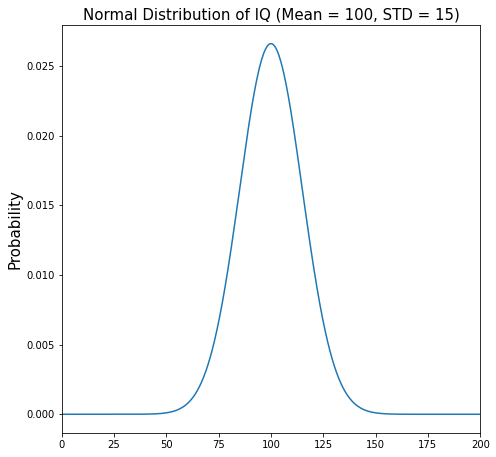

In [14]:
# your code here
import numpy as np
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# IQ scores
mu = 100
std = 15
snd = stats.norm(mu, std)

x = np.linspace(0,200,1000)

plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(0, 200)
plt.title('Normal Distribution of IQ (Mean = 100, STD = 15)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

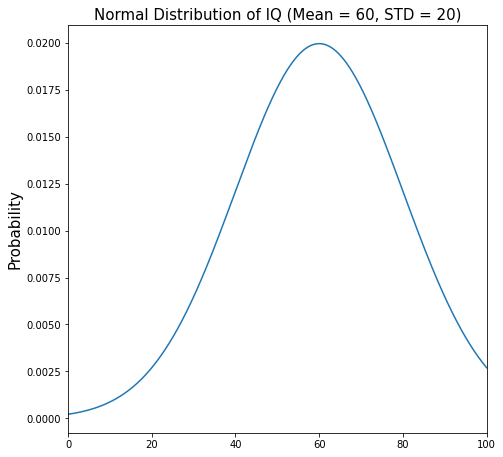

In [15]:
# Student marks
mu = 60
std = 20
snd = stats.norm(mu, std)

x = np.linspace(0,100,1000)

plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(0, 100)
plt.title('Normal Distribution of IQ (Mean = 60, STD = 20)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

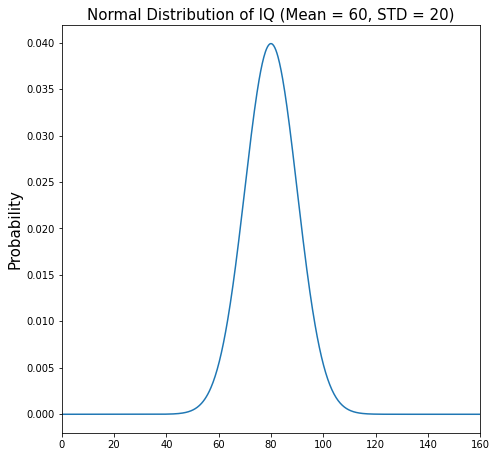

In [16]:
# Measure of weight
mu = 80
std = 10
snd = stats.norm(mu, std)

x = np.linspace(0,200,1000)

plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(0, 160)
plt.title('Normal Distribution of IQ (Mean = 60, STD = 20)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

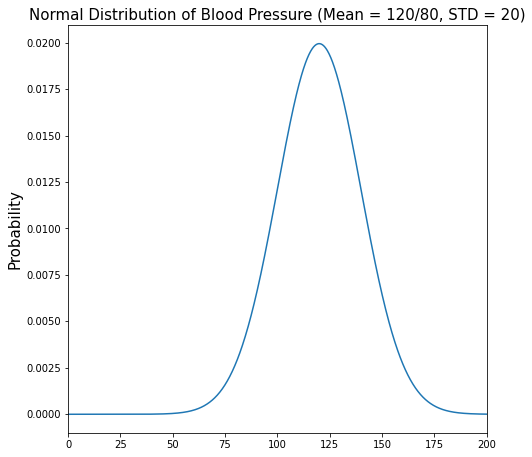

In [17]:
# Measure of blood pressure mean
mu = 120
std = 20
snd = stats.norm(mu, std)

x = np.linspace(0,200,1000)

plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(0, 200)
plt.title('Normal Distribution of Blood Pressure (Mean = 120/80, STD = 20)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

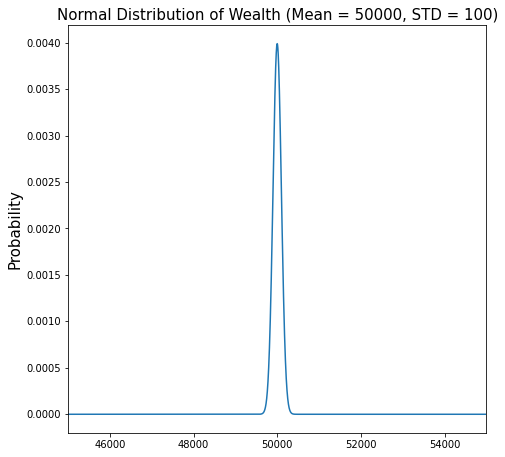

In [18]:
# Measure of wealth
mu = 50000
std = 100
snd = stats.norm(mu, std)

x = np.linspace(0,100000,100000)

plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(45000, 55000)
plt.title('Normal Distribution of Wealth (Mean = 50000, STD = 100)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()